# Etapa de Pré-Processamento

O ideal é que esta etapa seja realizada enquanto os dados estejam crus (antes de transformar em um objeto MNE ou transformado em um `RawData`). Esta afirmação ocorre pois os dados transformados em um objeto MNE `Epoch` ou `Evoked` não possuem todo os métodos para aplicar os **filtros temporais**, por exemplo, a ausência da negação de frequência (*notch_filter*).

Contudo, podemos obter bons resultados com filtros passa-baixa (*low pass*) ou passa-alta (*high pass*), configurando valores abaixo e acima da frequência de corte desejada respectivamente.

In [22]:
import matplotlib
import mne

%matplotlib inline

In [23]:
# carregamento do dataset (FIF file)
epochs = mne.read_epochs('files/ssvep-epo.fif')
print(epochs)

# filtranndo apenas alguns canais
epochs.pick_channels(['E108', 'E109', 'E116', 'E125', 'E118', 'E117', 'E126',
                      'E139', 'E127', 'E138', 'E140', 'E150', 'E151'])
print(epochs)

# configurando um evento para apresentação dos resultados
event = '4'

Reading files/ssvep-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4816.00 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
<EpochsFIF  |   125 events (all good), 0 - 4.816 sec, baseline off, ~294.8 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>
<EpochsFIF  |   125 events (all good), 0 - 4.816 sec, baseline off, ~15.1 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>
Effective window size : 1.024 (s)
[[[0.93674441 0.74141311 0.38201137 ... 0.68028774 0.5873291  0.2476712 ]
  [0.97638268 0.63740008 0.2965196  ... 0.64086363 0.59099704 0.23757344]
  [1.03881271 0.74823094 0.35052467 ... 0.76193674 0.66034644 0.25821164]
  ...
  [0.75223499 0.69451247 0.32560598 ... 0.57718996 0.40823829 0.07124297]
  [0.98549479 0.94989159 0.41630772 ... 0.65147623 0.47961005 0.1042054 ]
  [0.98260192 0.92993171 0.41861242 ... 0.61724877 0.4638

    Using multitaper spectrum estimation with 7 DPSS windows


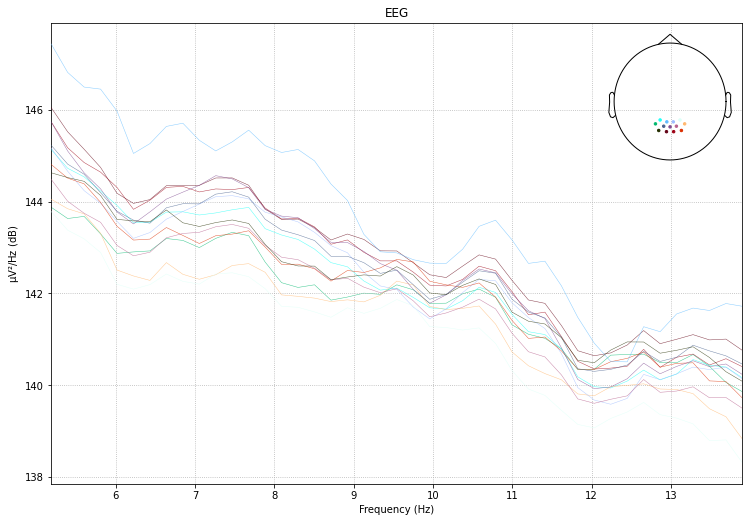

In [24]:
# apresentando o gráfico de um único evento com todos os eletrodos escolhidos SEM FILTRO
matplotlib.rcParams['figure.figsize'] = [12., 8.]
epochs[event].plot_psd(fmin = 5, fmax = 14)
print('')

## Filtros temporais

Apesar do nome ocorrer como "temporal", o resultado destes filtros ficam melhor visíveis em um gráfico do domínio da frequência, ao invés do domínio do tempo como o nome sugere. O filtro é dito temporal pois influencia diretamente na **periodicidade** das diversas frequências presentes em um sinal de EEG por exemplo. Mesmo que singelo, é possível perceber que o gráfico no domínio do tempo é mais suave de acordo com a quantidade de frequência "excluída" do sinal. Porém, vemos a diferença direta no domínio da frequência.

Existem 4 tipos de filtros temporais a saber:
- passa-alta (*high pass*)
- passa-baixa (*low pass*)
- passa-faixa (*band pass*)
- rejeita-faixa (*notch*)

Mostraremos o resultado de cada um deles (e o *notch filter* quebrando em `Raw`)

### *High pass filter*

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 237 samples (0.948 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


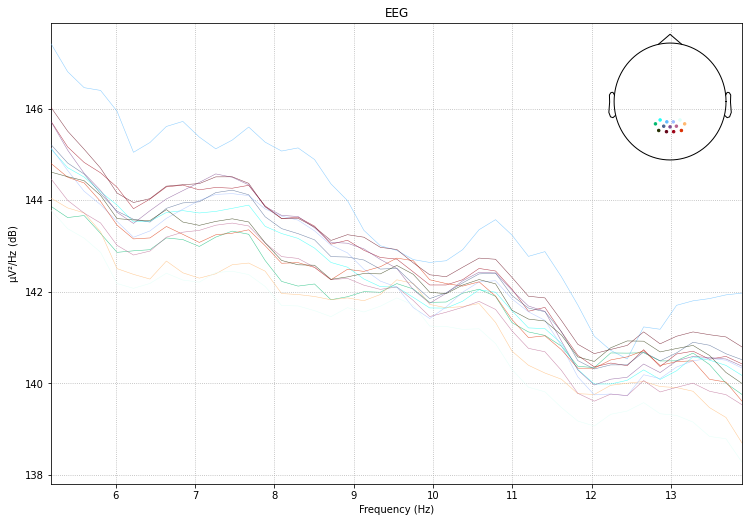

In [25]:
epo_h = epochs.copy().filter(l_freq=None, h_freq=14.)
epo_h[event].plot_psd(fmin = 5, fmax = 14)
print('')

Onde ocorre a "quebra" do sinal ou aplicação do filtro, é mostrado uma linha pontilhada, indicando para o *high-pass* que a partir daquele ponto (14 Hz) a frequência foi cortada. 

### *Low pass filter*

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 413 samples (1.652 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


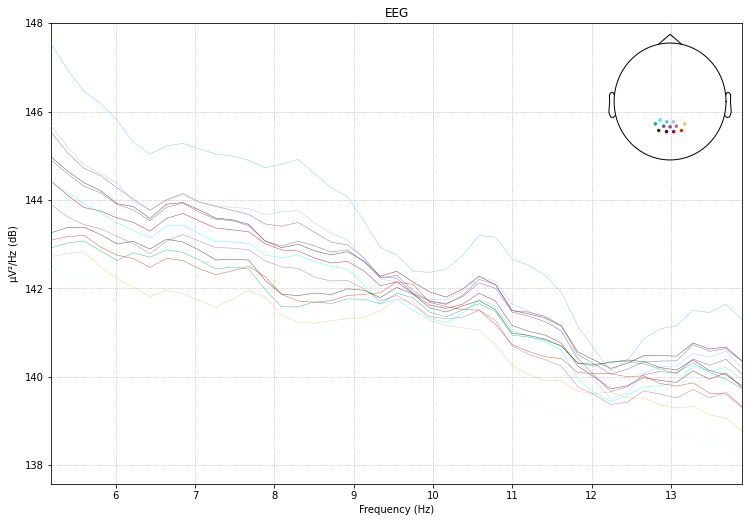

In [26]:
epo_l = epochs.copy().filter(l_freq=5, h_freq=None)
epo_l[event].plot_psd(fmin = 5, fmax = 14)
print('')

Aqui percebemos o corte das frequências abaixo de 5 Hz e o restante do sinal igual ao original.

### *Band pass filter*

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Fi

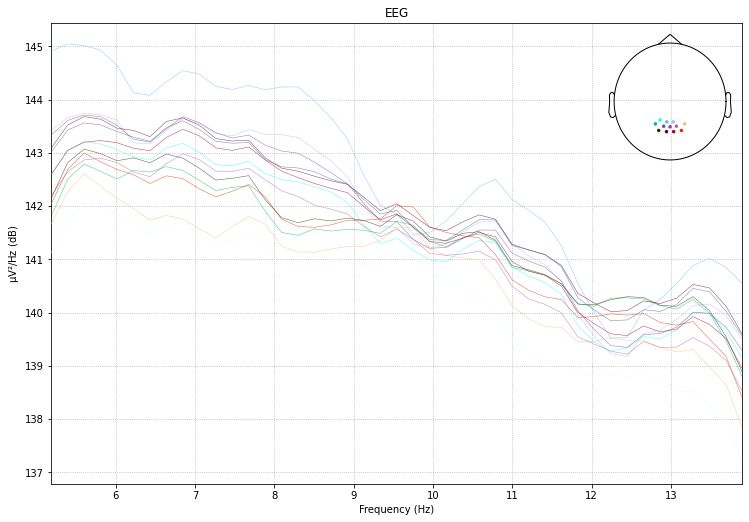

In [27]:
epo_b = epochs.copy().filter(l_freq=5, h_freq=14)
for i in range (9):
    epo_b = epo_b.copy().filter(l_freq=5, h_freq=14)

epo_b[event].plot_psd(fmin = 5, fmax = 14)
print('')

Neste exemplo vimos que é possível realizar o corte das frequências acima e abaixo do desejado. Porém, o resultado do que foi cortado acima e abaixo das frequências não foi igual ao resultado apresentado no corte das frequências originais. Iremos analisar isso com mais detalhes aplicando *low* e *high filter* em sequência e comparar com o resultado gerado anteriormente, obtendo algo bem parecido.

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 413 samples (1.652 sec)

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 237 samples (0.948 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


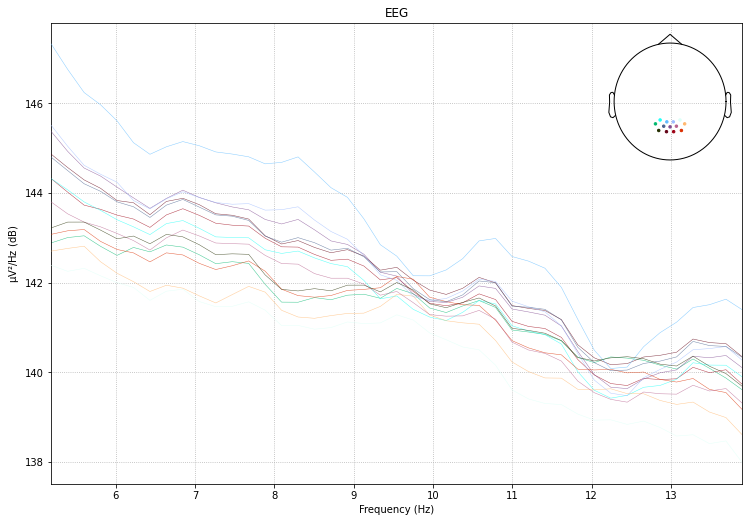

In [28]:
epo_b2 = epochs.copy().filter(l_freq=5, h_freq=None)
epo_b2.filter(l_freq=None, h_freq=14)
epo_b2[event].plot_psd(fmin = 5, fmax = 14)
print('')

Por fim, o *notch*, após reduzir o objeto para um `Raw` para simples visualização.

### notch filter

In [29]:
a = epochs.get_data()
a = a.transpose(1, 0, 2)
a = a.reshape(13, 125 * 1205)

# criando o objeto `info` (o restante dos valores já temos)
info = mne.create_info(ch_names=13,
                       sfreq=241.,
                       ch_types='eeg')

raw = mne.io.RawArray(a, info)

# raw.notch_filter?

Creating RawArray with float64 data, n_channels=13, n_times=150625
    Range : 0 ... 150624 =      0.000 ...   624.996 secs
Ready.


### Aplicações multiplas de filtros causam diferença?

Vamos analisar o que acontece se atenuarmos diversas vezes o mesmo filtro.

In [30]:
# aplicar os filtros N vezes necessárias e verificar se há modificações

# realizar ZOOM nas abcissas (frequência) para ver os sinais filtrados "mais de perto"
print('')

## Filtros espaciais

Filtros espaciais são utilizados para escolher canais de dados que melhor respondem a uma determinada tarefa. No caso do paradigma SSVEP, espera-se encontrar o conjunto de eletrodos que possuem respostas mais significativas em relação à frequências evocadas. Um algoritmo muito utilizado para este fim é o CAR (*Common Average Reference*).

Uma filtragem espacial pelo método CAR subtrai os artefatos comuns a todos os eletrodos. Comumente em BCI, para a redução de sinais não desejados, são posicionados eletrodos de referência em locais que tentam subtrair os potenciais comuns em todos os outros eletrodos. A técnica de filtragem espacial CAR reduz as componentes que estão em maior número nos eletrodos, subtraindo cada amostra do sinal pelo valor médio da diferença de potencial calculada para todos os eletrodos e a diferença aferida em cada eletrodo.

O método CAR é definito como:

\begin{equation}
V_i^{CAR} = V_i^{ER} - \frac{1}{N_e} \sum\limits_{j=1}^{N_e} V_j^{ER}
\end{equation}

onde $V_i^{ER}$ é o potencial do i-ésimo eletrodo e ${N_e}$ é o número de eletrodos utilizados.

No MNE a implementação do CAR se dá pela aplicação do método `set_eeg.reference`:

    Using multitaper spectrum estimation with 7 DPSS windows


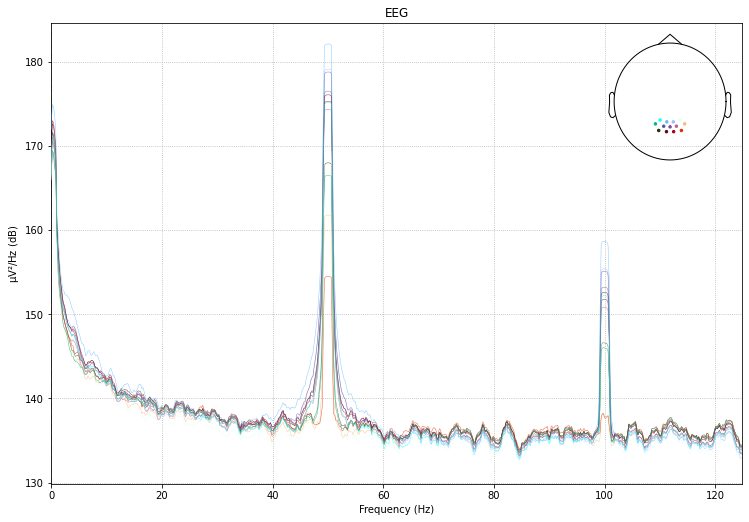

EEG channel type selected for re-referencing
Applying a custom EEG reference.
    Using multitaper spectrum estimation with 7 DPSS windows


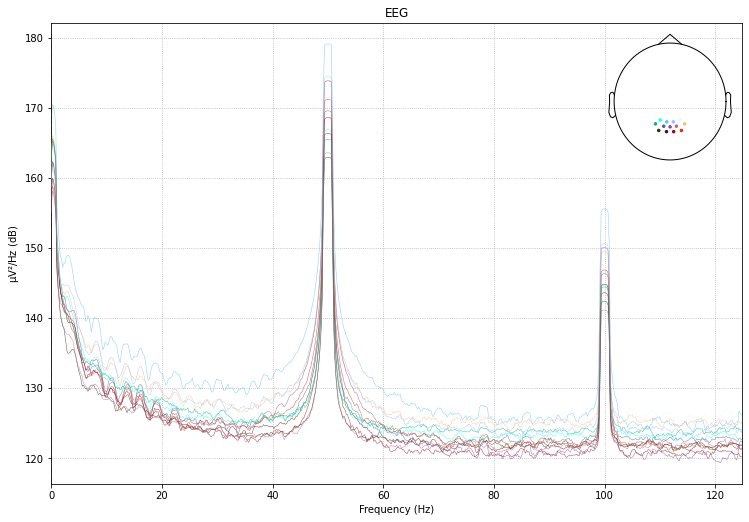

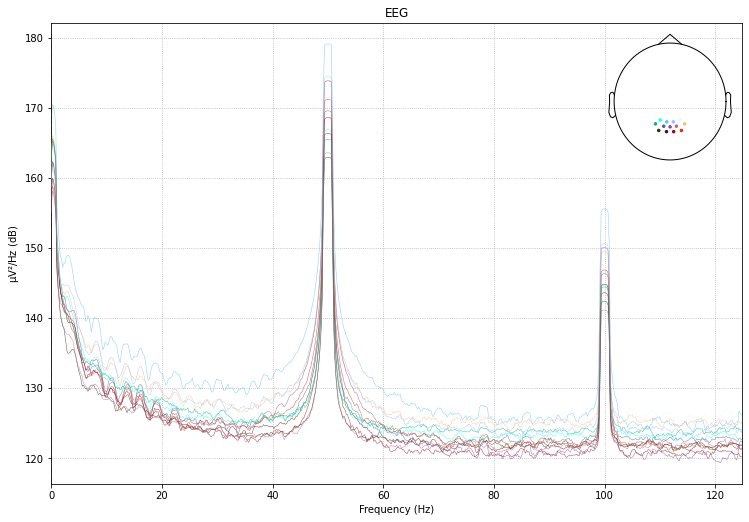

In [31]:
##Plot do epochs para referência
epochs[event].plot_psd()

epo_ref = mne.set_eeg_reference(epochs, ref_channels=['E116', 'E126', 'E150'])

epochs_welch, freqs = mne.time_frequency.psd_welch(epochs, fmin = 4, fmax = 15) 
print(epochs_welch)
v

#Plot do epoch após passar pelo filtro de referência
epo_ref[0][event].plot_psd()

### Questões de projeto

1. Como saber quais são os eletrodos a serem utilizados como referência?
2. A média de TODOS os eletrodos é um bom chute?
3. Como utilizar as informações de retorno do método `set_eeg_reference`

1. De acordo com https://www.educamaisbrasil.com.br/enem/biologia/cerebro, a região do cérebro que processa informações visuais é o Lobo Occipital ou a região traseira-inferior do crânio. Sendo assim, como o experimento trata de elementos visuais, os eletrodos a serem utilizados são os occipitais e para-occipitais.

2. Não, pois entrariam para o cálculo, sinais de tato, olfato, paladar e outras sensações, gerando um ruído para o cálculo de média. O correto, para este experimento, seria realizar uma média de todos eletrodos occipitais e para-occipitais, ou poderia ser aplicado algum outro filtro.

3. As informações de retorno do `set_eeg_reference` especificam explicitamente uma referência de eletrodos, no caso do experimento, os eletrodos principais referentes à visão, são os 'E116' = O1, 'E126' = Oz e 'E150' = O2. Assim filtrando menores ruídos de outros eletrodos. Porém, ainda é necessário aplicar um filtro para amenizar as frequências não desejadas.